<a href="https://colab.research.google.com/github/chewzzz1014/fyp/blob/master/ner/src/result_visulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# training
spacy_epochs = [0, 1, 3, 5, 7, 8, 10]
spacy_steps = [0, 500, 1000, 1500, 2000, 2500, 3000]
spacy_loss_ner = [1380.59, 223456.48, 81473.48, 61168.88, 49587.99, 42611.97, 38687.90]
spacy_loss_transformer = [3304.58, 318052.89, 39838.98, 26771.02, 20098.98, 21740.75, 13688.28]
spacy_ents_f = [0.32, 71.99, 80.84, 84.72, 82.57, 84.00, 84.71]
spacy_ents_p = [0.29, 75.15, 80.89, 83.78, 83.20, 82.48, 84.90]
spacy_ents_r = [0.36, 69.09, 80.80, 85.67, 81.96, 85.58, 84.52]
spacy_score = [0.00, 0.72, 0.81, 0.85, 0.83, 0.84, 0.85]

# result
# Overall performance
spacy_overall_performance = {"P": 83.77, "R": 85.67, "F": 84.71}

# Entity performance
spacy_entity_performance = {
    "NAME": {"P": 91.63, "R": 92.02, "F": 91.82},
    "EMAIL": {"P": 95.00, "R": 97.44, "F": 96.20},
    "PHONE": {"P": 93.67, "R": 96.73, "F": 95.17},
    "SKILL": {"P": 84.33, "R": 87.85, "F": 86.06},
    "UNI": {"P": 63.71, "R": 70.72, "F": 67.03},
    "DEG": {"P": 78.67, "R": 77.59, "F": 78.12},
    "COMPANY": {"P": 74.88, "R": 68.60, "F": 71.60},
    "JOB": {"P": 73.65, "R": 55.81, "F": 63.50},
    "WORK PER": {"P": 92.92, "R": 93.83, "F": 93.37},
    "LOC": {"P": 81.17, "R": 80.98, "F": 81.07},
    "STUDY PER": {"P": 84.96, "R": 81.70, "F": 83.30}
}


In [3]:
import re
import matplotlib.pyplot as plt

# Path to the uploaded log file
log_file_path = "/content/drive/MyDrive/FYP/Implementation/flair_ner/flair_output/training.log"

# Reading the log file
with open(log_file_path, "r") as file:
    log_data = file.readlines()

# Extracting loss values for each epoch
epoch_losses = []
for line in log_data:
    # Adjusted regular expression to match the new log format
    match = re.search(r"epoch (\d+)\s+-\s+iter \d+/\d+\s+-\s+loss ([0-9.]+)", line)
    if match:
        epoch = int(match.group(1))
        loss = float(match.group(2))
        epoch_losses.append((epoch, loss))

# Separating epochs and loss values for plotting
flair_epochs, flair_losses = zip(*epoch_losses)
print(flair_epochs)
print(flair_losses)

(1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 2

In [4]:
# Overall performance metrics
flair_f_score_micro = 0.7992
flair_f_score_macro = 0.8069
flair_accuracy = 0.6678
flair_loss = 0.18681490421295166

# Per-class performance metrics
flair_entity_performance = {
    "SKILL": {"precision": 0.7980, "recall": 0.8160, "f1-score": 0.8069},
    "JOB": {"precision": 0.6424, "recall": 0.6241, "f1-score": 0.6331},
    "LOC": {"precision": 0.7402, "recall": 0.8491, "f1-score": 0.7909},
    "WORK PER": {"precision": 0.8745, "recall": 0.9293, "f1-score": 0.9011},
    "COMPANY": {"precision": 0.6924, "recall": 0.6924, "f1-score": 0.6924},
    "UNI": {"precision": 0.7109, "recall": 0.6827, "f1-score": 0.6965},
    "DEG": {"precision": 0.8162, "recall": 0.7957, "f1-score": 0.8058},
    "STUDY PER": {"precision": 0.7729, "recall": 0.8271, "f1-score": 0.7991},
    "NAME": {"precision": 0.8791, "recall": 0.8915, "f1-score": 0.8852},
    "PHONE": {"precision": 0.9406, "recall": 0.9596, "f1-score": 0.9500},
    "EMAIL": {"precision": 0.9096, "recall": 0.9194, "f1-score": 0.9144}
}

# Aggregated performance metrics
flair_aggregated_performance = {
    "micro_avg": {"precision": 0.7900, "recall": 0.8085, "f1-score": 0.7992},
    "macro_avg": {"precision": 0.7979, "recall": 0.8170, "f1-score": 0.8069},
    "weighted_avg": {"precision": 0.7897, "recall": 0.8085, "f1-score": 0.7988}
}


# Training Loss

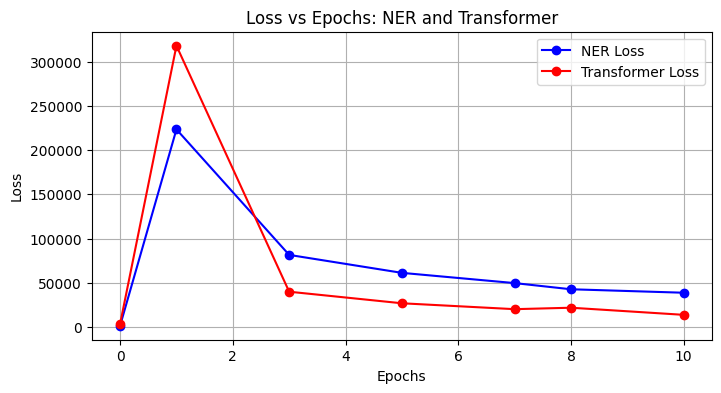

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(spacy_epochs, spacy_loss_ner, label="NER Loss", marker='o', linestyle='-', color='blue')
plt.plot(spacy_epochs, spacy_loss_transformer, label="Transformer Loss", marker='o', linestyle='-', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs: NER and Transformer')
plt.legend()

plt.grid(True)
plt.show()

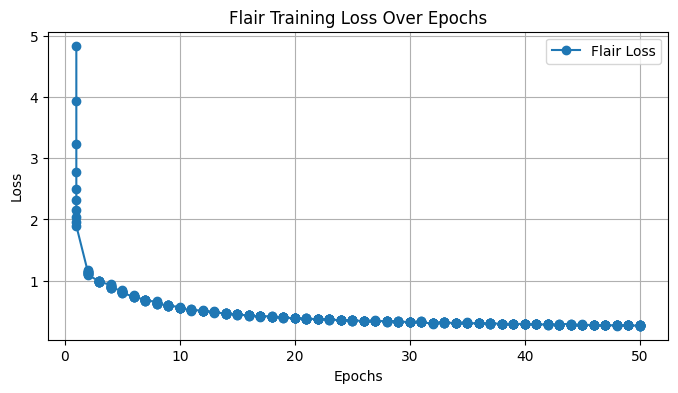

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(flair_epochs, flair_losses, label="Flair Loss", marker='o')

plt.title("Flair Training Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Overall Performance

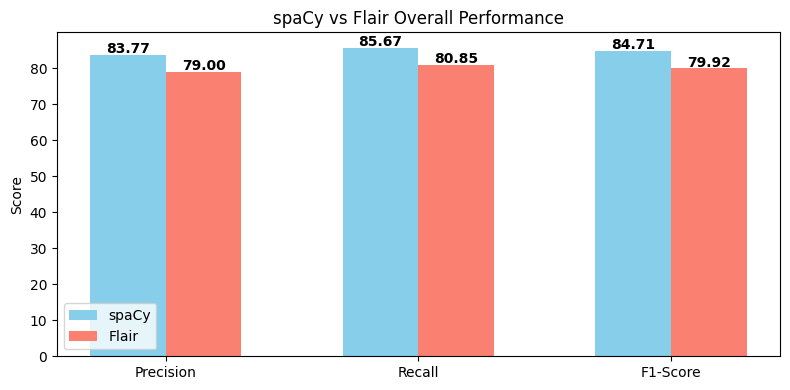

In [10]:
import matplotlib.pyplot as plt

# SpaCy overall performance (precision, recall, f1-score)
spacy_overall_performance = {"P": 83.77, "R": 85.67, "F": 84.71}

# Flair aggregated performance (precision, recall, f1-score)
flair_weighted_avg_performance = flair_aggregated_performance["micro_avg"]

# Extract values from Flair weighted_avg
flair_precision_weighted = flair_weighted_avg_performance["precision"] * 100
flair_recall_weighted = flair_weighted_avg_performance["recall"] * 100
flair_f1_weighted = flair_weighted_avg_performance["f1-score"] * 100

# Converting SpaCy's performance to match Flair's (out of 1.0 instead of percentage)
spacy_precision = spacy_overall_performance["P"]
spacy_recall = spacy_overall_performance["R"]
spacy_f1 = spacy_overall_performance["F"]

# Define labels and data for plotting
labels = ['Precision', 'Recall', 'F1-Score']
spacy_values = [spacy_precision, spacy_recall, spacy_f1]
flair_values = [flair_precision_weighted, flair_recall_weighted, flair_f1_weighted]

# Create subplots (1 row, 3 columns)
fig, ax = plt.subplots(figsize=(8, 4))

# Position for the bars
x = range(len(labels))

# Bar width
width = 0.3

# Plotting Precision, Recall, and F1-score for both SpaCy and Flair
bars_spacy = ax.bar([i - width/2 for i in x], spacy_values, width, label='spaCy', color='skyblue')
bars_flair = ax.bar([i + width/2 for i in x], flair_values, width, label='Flair', color='salmon')

# Adding value labels on top of the bars
for bar in bars_spacy:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{bar.get_height():.2f}', ha='center', fontsize=10, fontweight='bold')

for bar in bars_flair:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{bar.get_height():.2f}', ha='center', fontsize=10, fontweight='bold')

# Adding labels, title, and customizing the plot
ax.set_ylabel('Score')
ax.set_title('spaCy vs Flair Overall Performance')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Per-Entity Performance

In [ ]:
import numpy as np

# Extract entities and metrics
entities = list(spacy_entity_performance.keys())

# Sorting based on SpaCy's Precision (you can replace 'P' with 'R' or 'F' to sort by Recall or F1-score)
sorted_entities_by_spacy = sorted(entities, key=lambda x: spacy_entity_performance[x]["P"], reverse=True)

# Extract values for sorted entities
spacy_precision_sorted = [spacy_entity_performance[entity]["P"] for entity in sorted_entities_by_spacy]
flair_precision_sorted = [flair_entity_performance[entity]["precision"] * 100 for entity in sorted_entities_by_spacy]

# Plotting Precision comparison between SpaCy and Flair, sorted by SpaCy's Precision
x = np.arange(len(sorted_entities_by_spacy))
width = 0.35

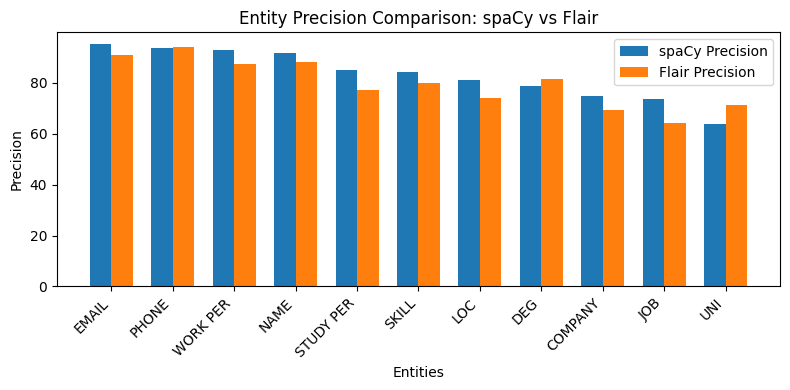

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x - width/2, spacy_precision_sorted, width, label='spaCy Precision')
ax.bar(x + width/2, flair_precision_sorted, width, label='Flair Precision')
ax.set_xlabel('Entities')
ax.set_ylabel('Precision')
ax.set_title('Entity Precision Comparison: spaCy vs Flair')
ax.set_xticks(x)
ax.set_xticklabels(sorted_entities_by_spacy, rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

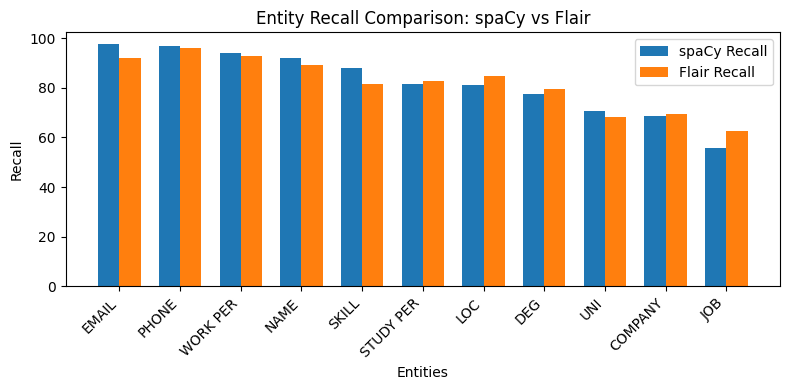

In [ ]:
# Sorting based on SpaCy's Recall
sorted_entities_by_spacy_recall = sorted(entities, key=lambda x: spacy_entity_performance[x]["R"], reverse=True)

# Extract values for sorted entities based on Recall
spacy_recall_sorted = [spacy_entity_performance[entity]["R"] for entity in sorted_entities_by_spacy_recall]
flair_recall_sorted = [flair_entity_performance[entity]["recall"] * 100 for entity in sorted_entities_by_spacy_recall]

# Plotting Recall comparison between SpaCy and Flair, sorted by SpaCy's Recall
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x - width/2, spacy_recall_sorted, width, label='spaCy Recall')
ax.bar(x + width/2, flair_recall_sorted, width, label='Flair Recall')
ax.set_xlabel('Entities')
ax.set_ylabel('Recall')
ax.set_title('Entity Recall Comparison: spaCy vs Flair')
ax.set_xticks(x)
ax.set_xticklabels(sorted_entities_by_spacy_recall, rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()

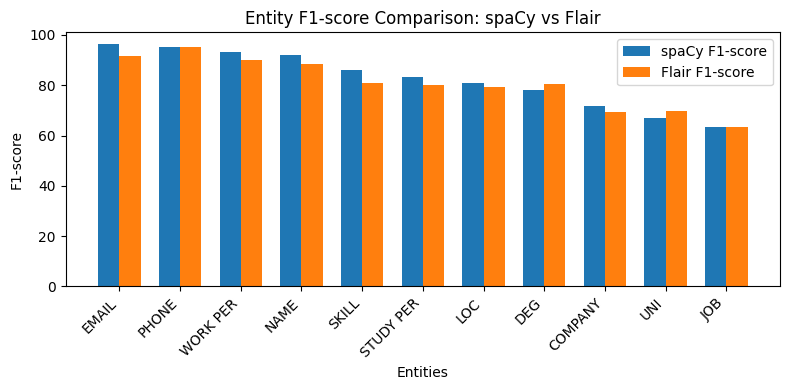

In [ ]:
# Sorting based on SpaCy's F1-score
sorted_entities_by_spacy_f1 = sorted(entities, key=lambda x: spacy_entity_performance[x]["F"], reverse=True)

# Extract values for sorted entities based on F1-score
spacy_f1_sorted = [spacy_entity_performance[entity]["F"] for entity in sorted_entities_by_spacy_f1]
flair_f1_sorted = [flair_entity_performance[entity]["f1-score"] * 100 for entity in sorted_entities_by_spacy_f1]

# Plotting F1-score comparison between SpaCy and Flair, sorted by SpaCy's F1-score
fig, ax = plt.subplots(figsize=(8, 4))
ax.bar(x - width/2, spacy_f1_sorted, width, label='spaCy F1-score')
ax.bar(x + width/2, flair_f1_sorted, width, label='Flair F1-score')
ax.set_xlabel('Entities')
ax.set_ylabel('F1-score')
ax.set_title('Entity F1-score Comparison: spaCy vs Flair')
ax.set_xticks(x)
ax.set_xticklabels(sorted_entities_by_spacy_f1, rotation=45, ha="right")
ax.legend()
plt.tight_layout()
plt.show()